In [21]:
from sklearn import datasets
iris=datasets.load_iris()

In [22]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

In [23]:
x=iris.data
y=iris.target
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3)

 class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)[source]¶

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)



In [25]:
clf.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
y_pred=clf.predict(x_test)


In [27]:
from sklearn import metrics
print("accuray:",metrics.accuracy_score(y_pred,y_test))

accuray: 1.0


In [28]:
t = clf.predict([[3, 5, 4, 2]])
iris.target_names[t]

array(['virginica'], dtype='<U10')

In [29]:
t = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[t]

'virginica'

In [30]:
t = clf.predict([[34, 54, 44, 24]])
iris.target_names[t]

array(['virginica'], dtype='<U10')

# findind imporant features

In [31]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.447886
petal width (cm)     0.395759
sepal length (cm)    0.084719
sepal width (cm)     0.071637
dtype: float64

No handles with labels found to put in legend.


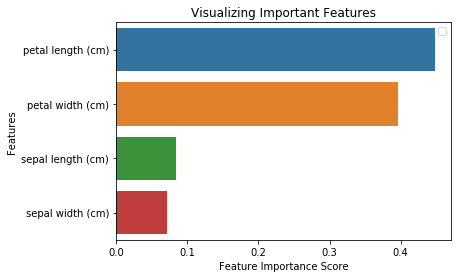

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# model fro m top features

In [33]:
x=data[['petal length', 'petal width','sepal length']]
y=data["species"]
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3)

In [34]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_test,y_test)
y_pred=clf.predict(x_test)
print("Accuracy uing top featuers",metrics.accuracy_score(y_pred,y_test))


Accuracy uing top featuers 1.0


# seeing image like decision trees

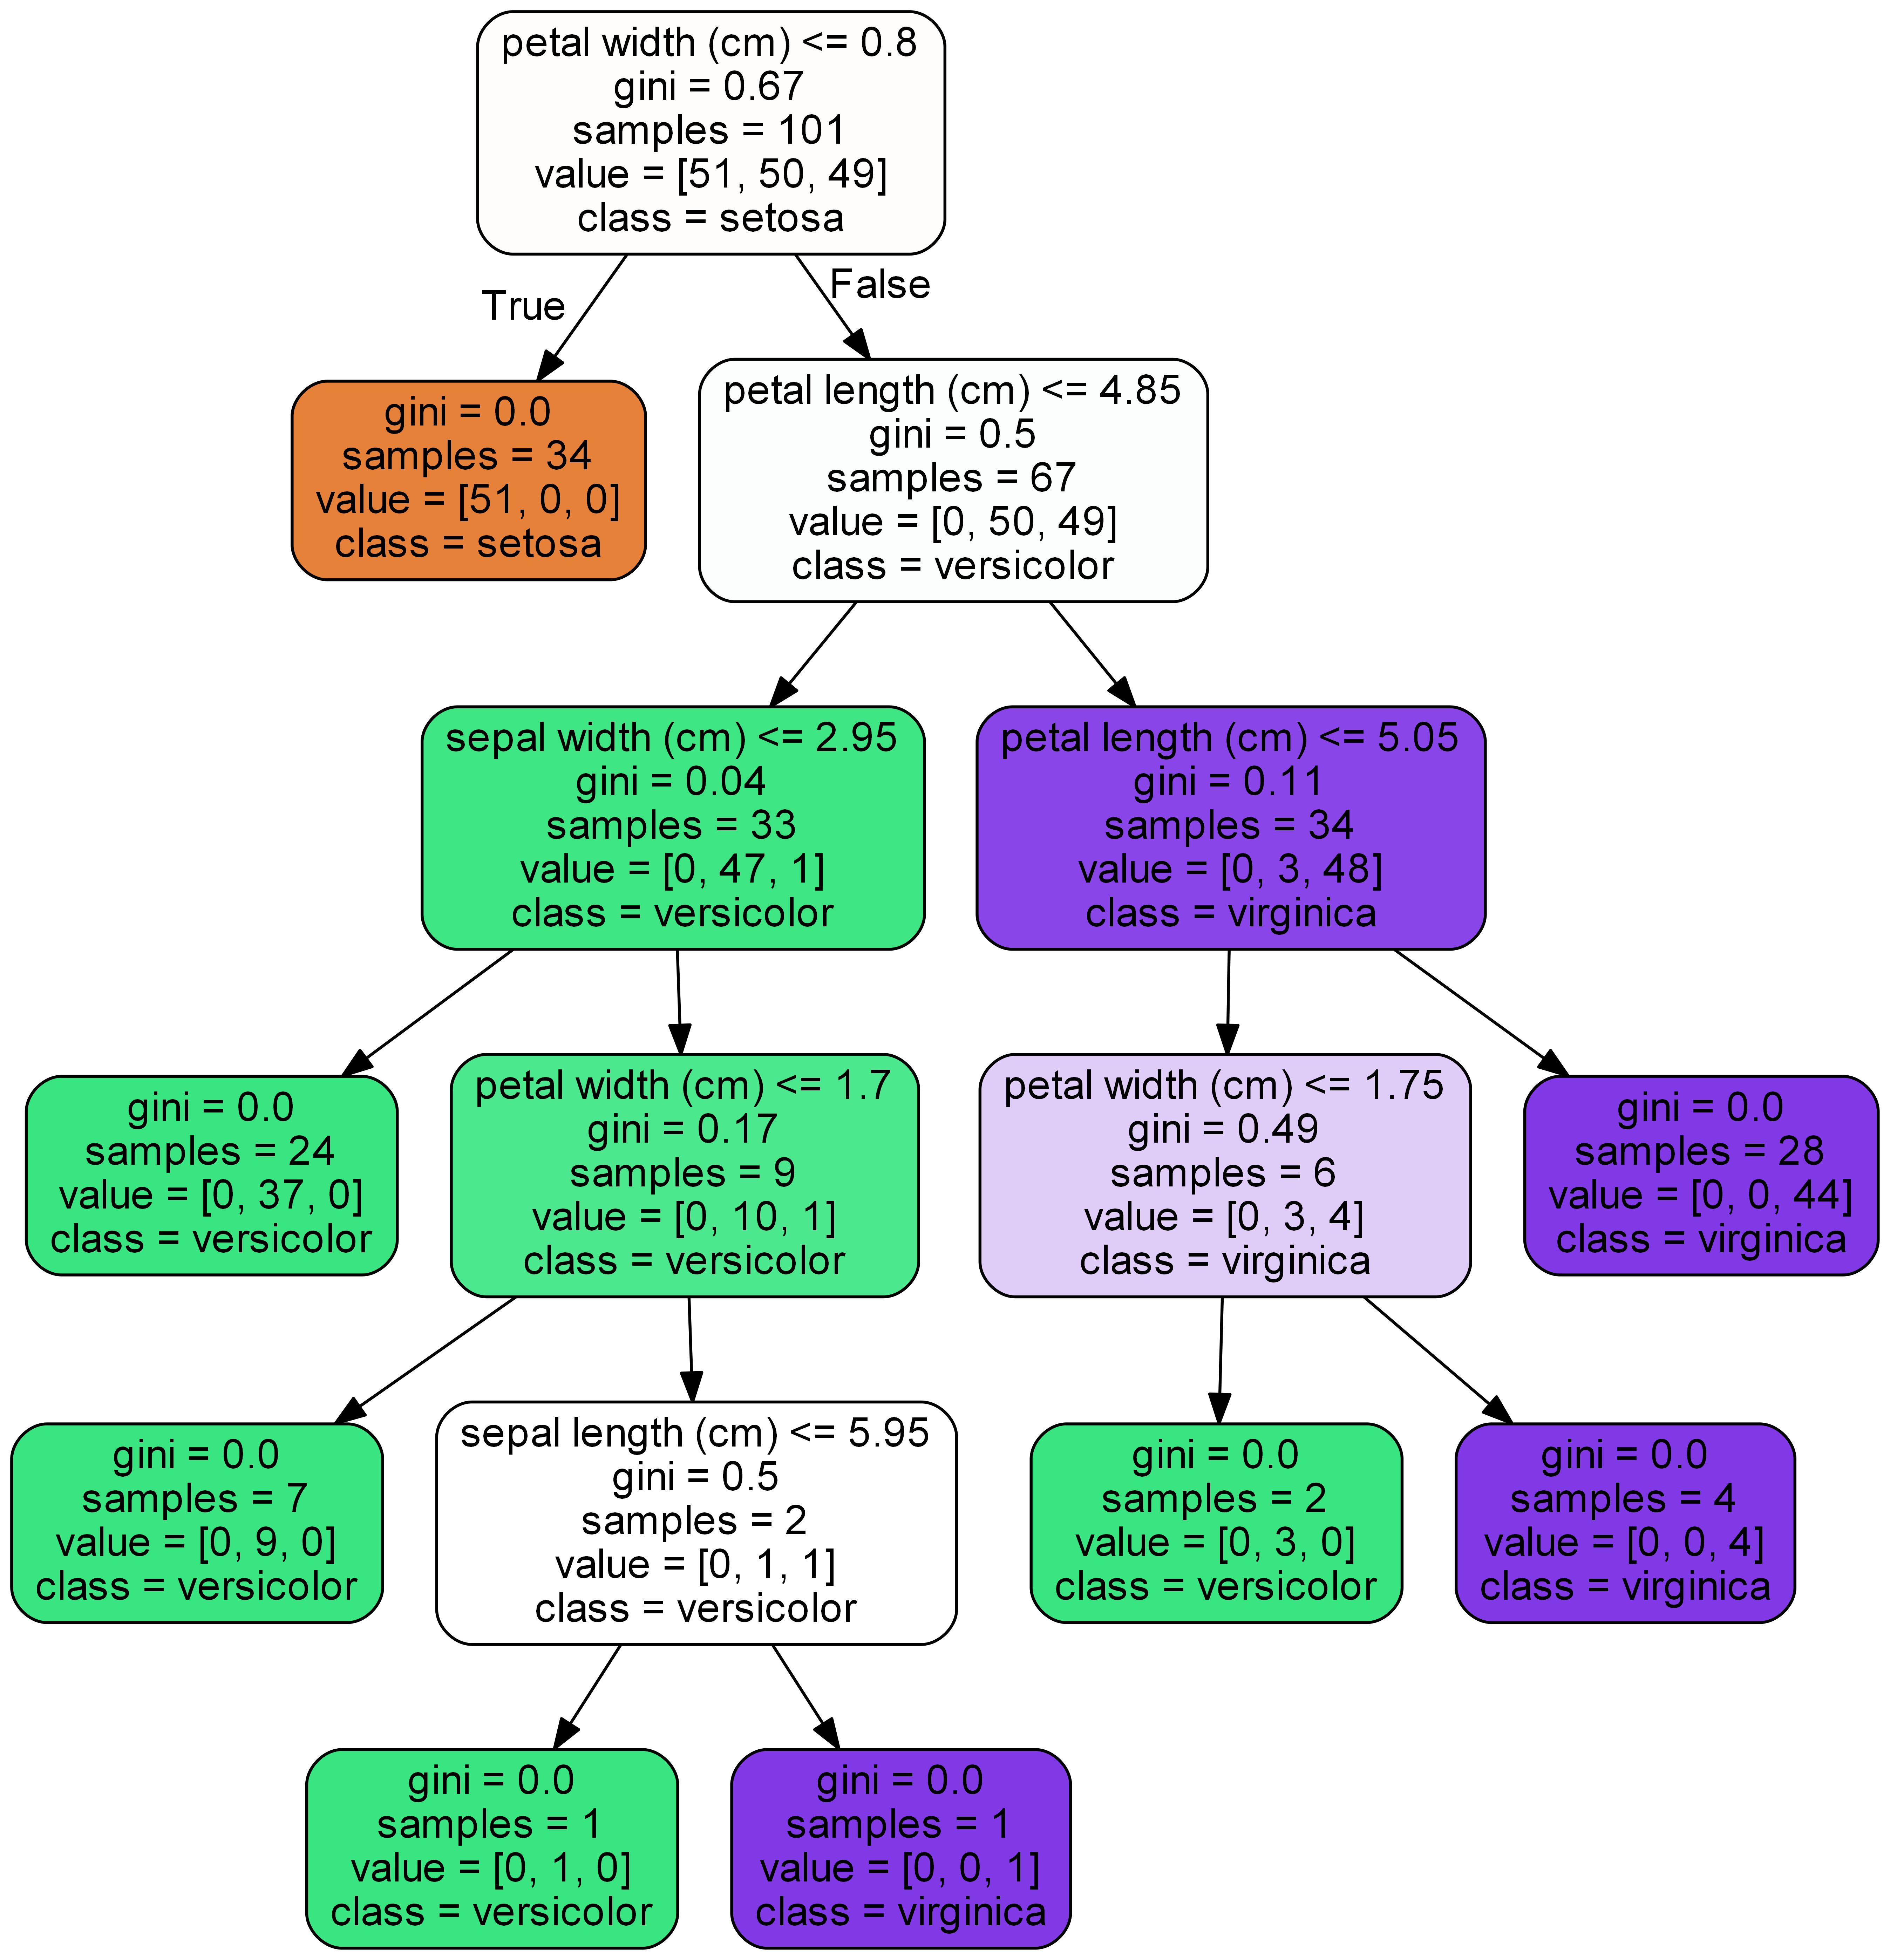

In [39]:
model = RandomForestClassifier(n_estimators=100)

# Train
model.fit(iris.data, iris.target)
# Extract single tree out of 100
estimator = model.estimators_[10]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')